In [33]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

In [1]:
df = pd.read_csv("gesture_label.csv")

print("Shape:", df.shape)
df

Shape: (116739, 9)


,frame,time,hand,landmark_id,x,y,z,hand_detected,Gesture
0,0,0.000000,Left,0,NaN,NaN,NaN,0,other
1,0,0.000000,Left,1,NaN,NaN,NaN,0,other
2,0,0.000000,Left,2,NaN,NaN,NaN,0,other
3,0,0.000000,Left,3,NaN,NaN,NaN,0,other
4,0,0.000000,Left,4,NaN,NaN,NaN,0,other
...,...,...,...,...,...,...,...,...,...
116734,4163,138.766667,Left,16,0.239537,0.464478,0.005846,1,other
116735,4163,138.766667,Left,17,0.292909,0.558650,-0.002619,1,other
116736,4163,138.766667,Left,18,0.295100,0.507017,-0.001884,1,other
116737,4163,138.766667,Left,19,0.285793,0.487047,0.001999,1,other


In [2]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 frame                0
time                 0
hand                 0
landmark_id          0
x                32214
y                32214
z                32214
hand_detected        0
Gesture              0
dtype: int64


In [3]:
df.dtypes

frame              int64
time             float64
hand              object
landmark_id        int64
x                float64
y                float64
z                float64
hand_detected      int64
Gesture           object
dtype: object

In [4]:
df_clean = df[(df['hand_detected'] == 1) & df[['x', 'y', 'z']].notna().all(axis=1)]

In [5]:
df_clean

,frame,time,hand,landmark_id,x,y,z,hand_detected,Gesture
252,6,0.200000,Right,0,0.439152,0.415923,-1.800000e-07,1,other
253,6,0.200000,Right,1,0.410372,0.394646,6.217541e-03,1,other
254,6,0.200000,Right,2,0.392198,0.367449,1.011078e-02,1,other
255,6,0.200000,Right,3,0.379121,0.346782,1.182480e-02,1,other
256,6,0.200000,Right,4,0.368621,0.328528,1.363831e-02,1,other
...,...,...,...,...,...,...,...,...,...
116734,4163,138.766667,Left,16,0.239537,0.464478,5.845563e-03,1,other
116735,4163,138.766667,Left,17,0.292909,0.558650,-2.618652e-03,1,other
116736,4163,138.766667,Left,18,0.295100,0.507017,-1.884385e-03,1,other
116737,4163,138.766667,Left,19,0.285793,0.487047,1.999497e-03,1,other


In [6]:
df_clean['Gesture'].value_counts()

Gesture
h        32423
p        23290
r        16086
s         5481
other     5166
g         2079
Name: count, dtype: int64

In [7]:
frame_per_gesture = df_clean.groupby('Gesture')['frame'].nunique().sort_values(ascending=False)

print("จำนวน frame ต่อ Gesture:")
print(frame_per_gesture)

จำนวน frame ต่อ Gesture:
Gesture
h        1363
p         872
r         620
other     242
s         202
g          99
Name: frame, dtype: int64


In [8]:
df_clean.describe()

,frame,time,landmark_id,x,y,z,hand_detected
count,84525.000000,84525.000000,84525.000000,84525.000000,84525.000000,84525.000000,84525.0
mean,1974.845466,65.828182,10.000000,0.451664,0.531048,-0.005907,1.0
std,1133.219776,37.773993,6.055337,0.091822,0.150937,0.038735,0.0
min,6.000000,0.200000,0.000000,0.084254,-0.091092,-0.149280,1.0
25%,1040.000000,34.666667,5.000000,0.398037,0.435814,-0.031617,1.0
50%,1886.000000,62.866667,10.000000,0.451560,0.538390,-0.007313,1.0
75%,2890.000000,96.333333,15.000000,0.509042,0.636506,0.013573,1.0
max,4163.000000,138.766667,20.000000,0.757710,1.159267,0.161969,1.0


<Axes: xlabel='x'>

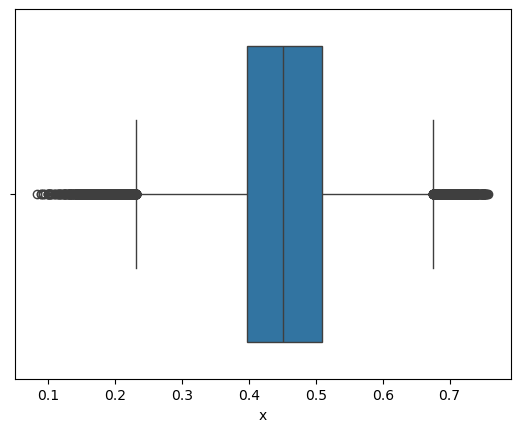

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_clean['x'])

<Axes: xlabel='y'>

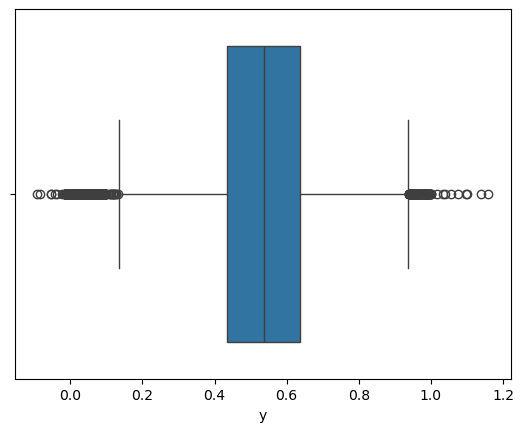

In [10]:
sns.boxplot(x=df_clean['y'])

<Axes: xlabel='z'>

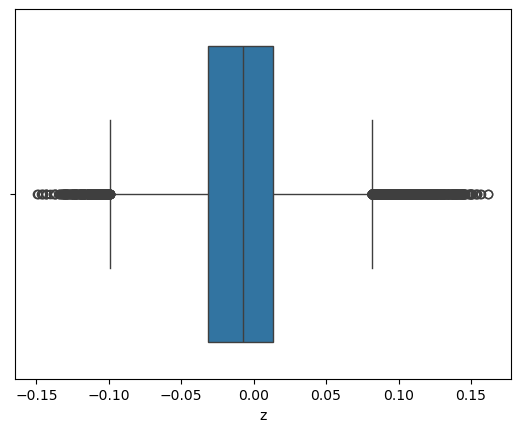

In [11]:
sns.boxplot(x=df_clean['z'])

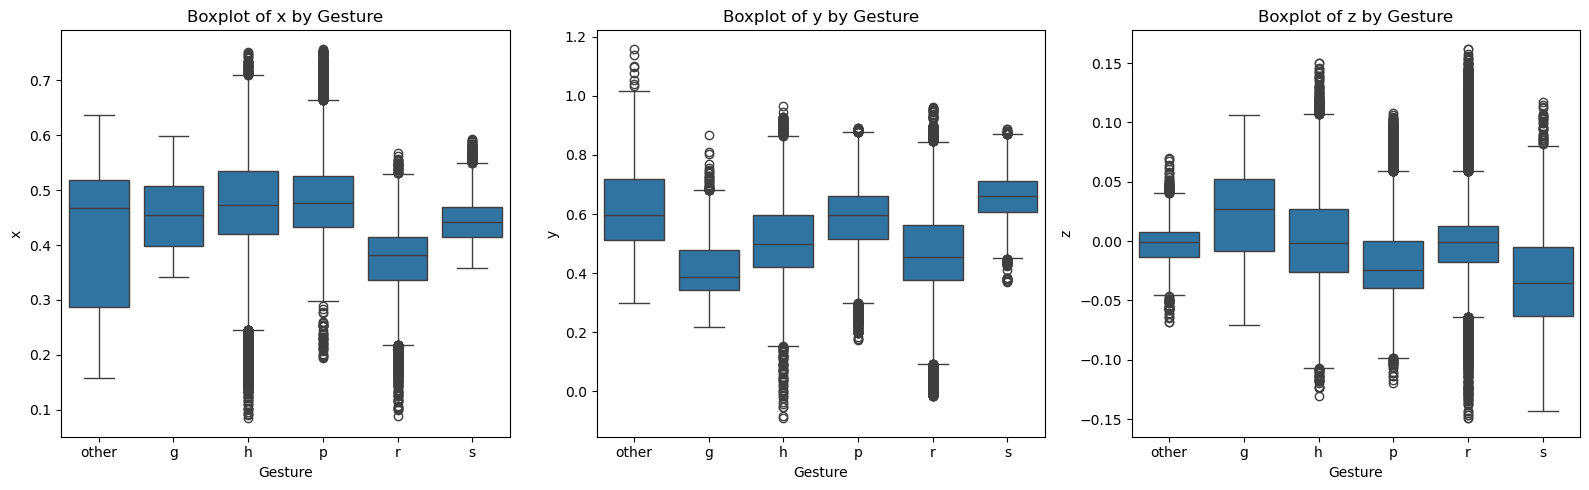

In [12]:

plt.figure(figsize=(16, 5))

# 1. x-coordinate
plt.subplot(1, 3, 1)
sns.boxplot(x='Gesture', y='x', data=df_clean)
plt.title('Boxplot of x by Gesture')

# 2. y-coordinate
plt.subplot(1, 3, 2)
sns.boxplot(x='Gesture', y='y', data=df_clean)
plt.title('Boxplot of y by Gesture')

# 3. z-coordinate
plt.subplot(1, 3, 3)
sns.boxplot(x='Gesture', y='z', data=df_clean)
plt.title('Boxplot of z by Gesture')

plt.tight_layout()
plt.show()


In [13]:

y_negative_rows = df_clean[df_clean['y'] < 0]

print(f"number of y < 0: {len(y_negative_rows)}")
y_negative_rows.head(10)


number of y < 0: 98


,frame,time,hand,landmark_id,x,y,z,hand_detected,Gesture
6786,283,9.433333,Left,3,0.551796,-0.022736,-0.041823,1,h
6787,283,9.433333,Left,4,0.528741,-0.091092,-0.032580,1,h
6789,283,9.433333,Left,6,0.554458,-0.084347,0.005224,1,h
6790,283,9.433333,Left,7,0.518563,-0.053072,-0.006367,1,h
6791,283,9.433333,Left,8,0.511057,-0.010863,-0.011769,1,h
6793,283,9.433333,Left,10,0.537700,-0.043046,0.037109,1,h
6794,283,9.433333,Left,11,0.504596,-0.005290,0.016535,1,h
6797,283,9.433333,Left,14,0.524839,-0.000309,0.057587,1,h
6808,284,9.466667,Left,4,0.520141,-0.052323,-0.055054,1,h
6810,284,9.466667,Left,6,0.557657,-0.037280,0.018713,1,h


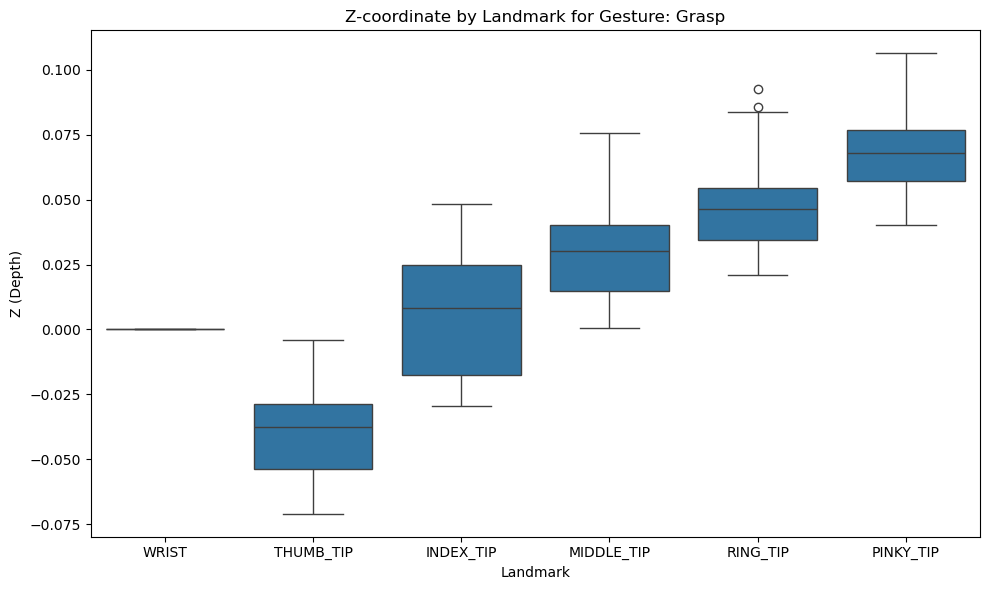

In [14]:

grasp_df = df_clean[df_clean["Gesture"] == "g"]


key_landmarks = [0, 4, 8, 12, 16, 20]
landmark_names = {
    0: "WRIST", 4: "THUMB_TIP", 8: "INDEX_TIP",
    12: "MIDDLE_TIP", 16: "RING_TIP", 20: "PINKY_TIP"
}


grasp_keypoints = grasp_df[grasp_df["landmark_id"].isin(key_landmarks)].copy()
grasp_keypoints["landmark_name"] = grasp_keypoints["landmark_id"].map(landmark_names)


plt.figure(figsize=(10, 6))
sns.boxplot(x="landmark_name", y="z", data=grasp_keypoints)
plt.title("Z-coordinate by Landmark for Gesture: Grasp")
plt.xlabel("Landmark")
plt.ylabel("Z (Depth)")
plt.tight_layout()
plt.show()

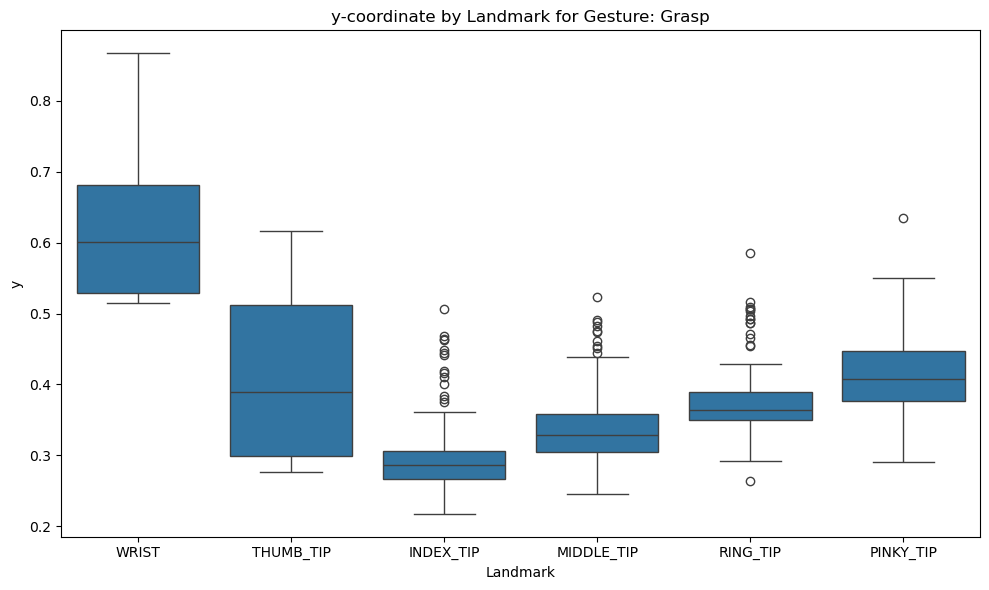

In [15]:

grasp_df = df_clean[df_clean["Gesture"] == "g"]


key_landmarks = [0, 4, 8, 12, 16, 20]
landmark_names = {
    0: "WRIST", 4: "THUMB_TIP", 8: "INDEX_TIP",
    12: "MIDDLE_TIP", 16: "RING_TIP", 20: "PINKY_TIP"
}


grasp_keypoints = grasp_df[grasp_df["landmark_id"].isin(key_landmarks)].copy()
grasp_keypoints["landmark_name"] = grasp_keypoints["landmark_id"].map(landmark_names)


plt.figure(figsize=(10, 6))
sns.boxplot(x="landmark_name", y="y", data=grasp_keypoints)
plt.title("y-coordinate by Landmark for Gesture: Grasp")
plt.xlabel("Landmark")
plt.ylabel("y")
plt.tight_layout()
plt.show()

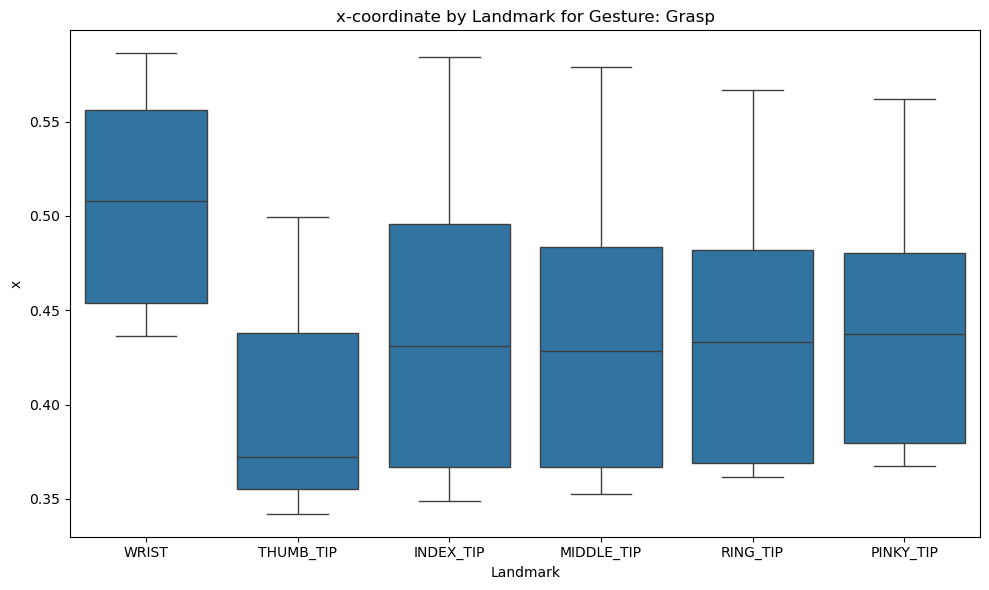

In [16]:

grasp_df = df_clean[df_clean["Gesture"] == "g"]


key_landmarks = [0, 4, 8, 12, 16, 20]
landmark_names = {
    0: "WRIST", 4: "THUMB_TIP", 8: "INDEX_TIP",
    12: "MIDDLE_TIP", 16: "RING_TIP", 20: "PINKY_TIP"
}


grasp_keypoints = grasp_df[grasp_df["landmark_id"].isin(key_landmarks)].copy()
grasp_keypoints["landmark_name"] = grasp_keypoints["landmark_id"].map(landmark_names)


plt.figure(figsize=(10, 6))
sns.boxplot(x="landmark_name", y="x", data=grasp_keypoints)
plt.title("x-coordinate by Landmark for Gesture: Grasp")
plt.xlabel("Landmark")
plt.ylabel("x")
plt.tight_layout()
plt.show()

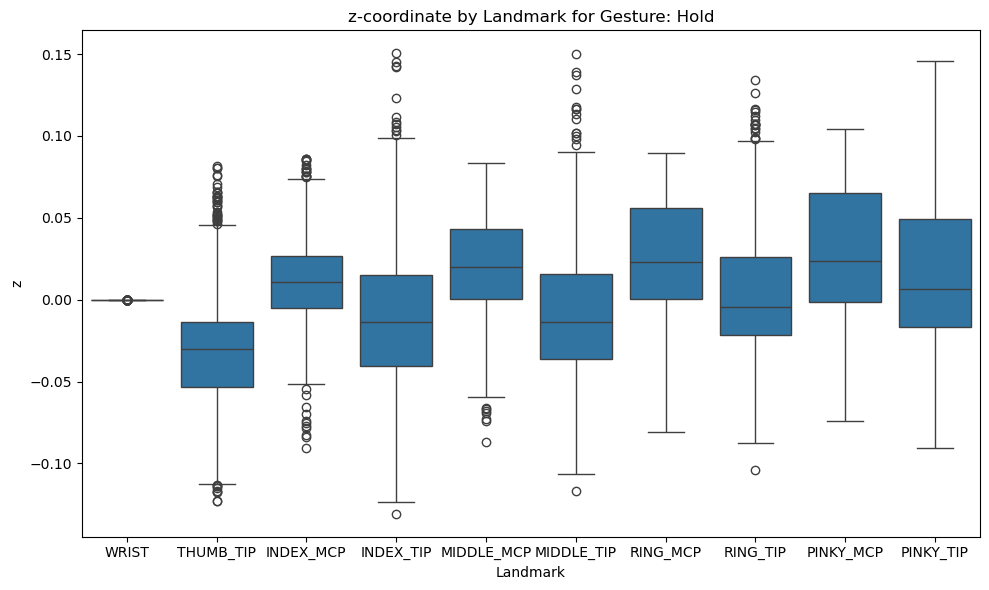

In [17]:

grasp_df = df_clean[df_clean["Gesture"] == "h"]


key_landmarks = [0, 4, 5, 8, 9, 12, 13, 16, 17, 20]
landmark_names = {
    0: "WRIST", 4: "THUMB_TIP", 5: "INDEX_MCP", 8: "INDEX_TIP",
    9: "MIDDLE_MCP", 12: "MIDDLE_TIP", 13: "RING_MCP",
    16: "RING_TIP", 17: "PINKY_MCP",20: "PINKY_TIP"
}


grasp_keypoints = grasp_df[grasp_df["landmark_id"].isin(key_landmarks)].copy()
grasp_keypoints["landmark_name"] = grasp_keypoints["landmark_id"].map(landmark_names)


plt.figure(figsize=(10, 6))
sns.boxplot(x="landmark_name", y="z", data=grasp_keypoints)
plt.title("z-coordinate by Landmark for Gesture: Hold")
plt.xlabel("Landmark")
plt.ylabel("z")
plt.tight_layout()
plt.show()

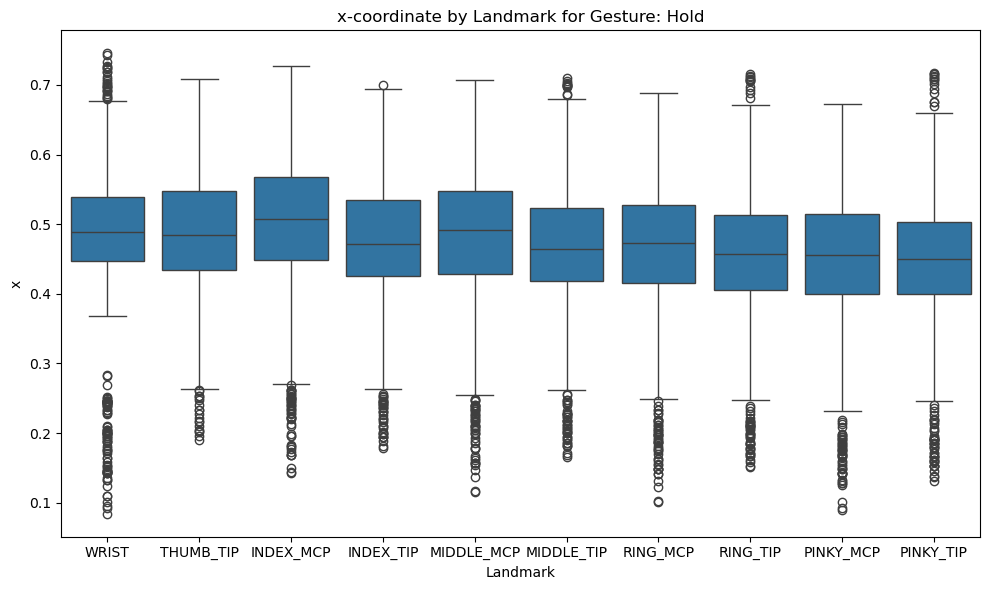

In [18]:

grasp_df = df_clean[df_clean["Gesture"] == "h"]


key_landmarks = [0, 4, 5, 8, 9, 12, 13, 16, 17, 20]
landmark_names = {
    0: "WRIST", 4: "THUMB_TIP", 5: "INDEX_MCP", 8: "INDEX_TIP",
    9: "MIDDLE_MCP", 12: "MIDDLE_TIP", 13: "RING_MCP",
    16: "RING_TIP", 17: "PINKY_MCP",20: "PINKY_TIP"
}


grasp_keypoints = grasp_df[grasp_df["landmark_id"].isin(key_landmarks)].copy()
grasp_keypoints["landmark_name"] = grasp_keypoints["landmark_id"].map(landmark_names)


plt.figure(figsize=(10, 6))
sns.boxplot(x="landmark_name", y="x", data=grasp_keypoints)
plt.title("x-coordinate by Landmark for Gesture: Hold")
plt.xlabel("Landmark")
plt.ylabel("x")
plt.tight_layout()
plt.show()

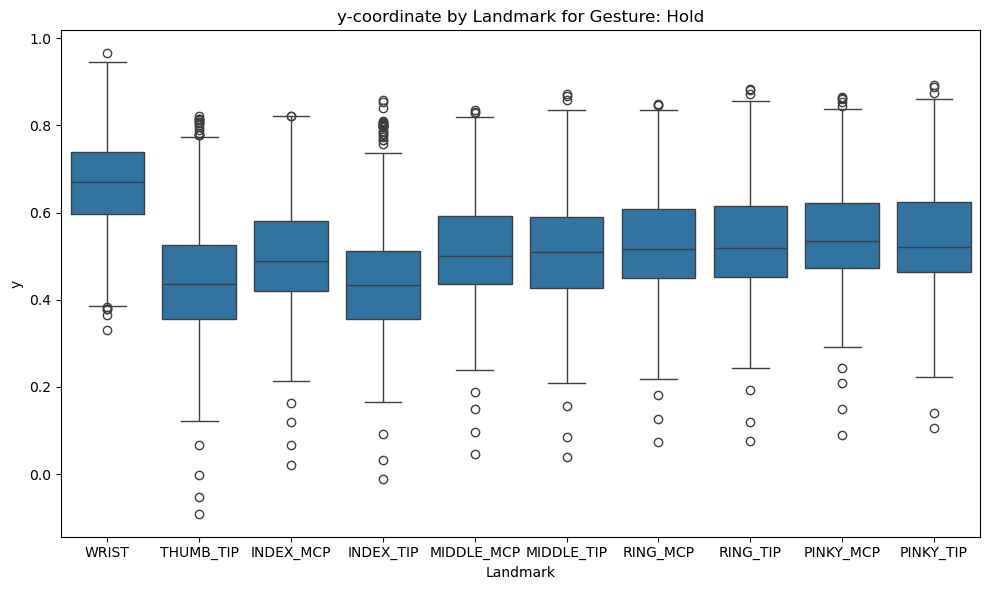

In [19]:

grasp_df = df_clean[df_clean["Gesture"] == "h"]


key_landmarks = [0, 4, 5, 8, 9, 12, 13, 16, 17, 20]
landmark_names = {
    0: "WRIST", 4: "THUMB_TIP", 5: "INDEX_MCP", 8: "INDEX_TIP",
    9: "MIDDLE_MCP", 12: "MIDDLE_TIP", 13: "RING_MCP",
    16: "RING_TIP", 17: "PINKY_MCP",20: "PINKY_TIP"
}


grasp_keypoints = grasp_df[grasp_df["landmark_id"].isin(key_landmarks)].copy()
grasp_keypoints["landmark_name"] = grasp_keypoints["landmark_id"].map(landmark_names)


plt.figure(figsize=(10, 6))
sns.boxplot(x="landmark_name", y="y", data=grasp_keypoints)
plt.title("y-coordinate by Landmark for Gesture: Hold")
plt.xlabel("Landmark")
plt.ylabel("y")
plt.tight_layout()
plt.show()

In [20]:

df_wide = df_clean.pivot_table(index=["frame", "Gesture"], 
                                columns="landmark_id", 
                                values=["x", "y", "z"])
df_wide.columns = [f"{coord}_{lmk}" for coord, lmk in df_wide.columns]
df_wide = df_wide.reset_index()


In [21]:
df_wide

,frame,Gesture,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,z_11,z_12,z_13,z_14,z_15,z_16,z_17,z_18,z_19,z_20
0,6,other,0.439152,0.410372,0.392198,0.379121,0.368621,0.413687,0.389965,0.382798,...,0.018761,0.015359,0.013906,0.018745,0.016704,0.014214,0.011729,0.016528,0.018544,0.019494
1,7,other,0.446880,0.420233,0.400958,0.386086,0.375873,0.417231,0.396619,0.386996,...,0.012104,0.010964,0.013766,0.016467,0.014878,0.013508,0.018862,0.020266,0.020490,0.021125
2,8,other,0.448999,0.424995,0.409311,0.397226,0.389651,0.437639,0.419415,0.402987,...,-0.001197,-0.001331,0.004053,0.004623,0.004954,0.004872,0.010908,0.010748,0.011465,0.012303
3,9,other,0.461615,0.435223,0.419272,0.408268,0.399821,0.437466,0.415694,0.402070,...,0.005441,0.003926,0.006740,0.004849,0.002583,0.001818,0.006266,0.003407,0.003586,0.004994
4,10,other,0.466189,0.442301,0.426694,0.414771,0.407884,0.452656,0.433908,0.417616,...,0.012450,0.010562,0.017282,0.019520,0.016679,0.014452,0.023631,0.024325,0.023688,0.023627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,4159,other,0.276108,0.235580,0.210509,0.192576,0.176305,0.229980,0.209859,0.202688,...,0.004717,0.012437,-0.005185,-0.004209,0.002419,0.008547,-0.002683,-0.000475,0.004962,0.010407
3394,4160,other,0.276328,0.235721,0.210938,0.193440,0.176782,0.230328,0.209717,0.202042,...,0.003421,0.011037,-0.005926,-0.005329,0.001278,0.007422,-0.003490,-0.001899,0.003240,0.008569
3395,4161,other,0.275588,0.235362,0.210758,0.193059,0.176679,0.229746,0.210076,0.202834,...,0.004471,0.011329,-0.004877,-0.004109,0.001655,0.006960,-0.002485,-0.001186,0.003294,0.008017
3396,4162,other,0.276735,0.236113,0.210839,0.192967,0.176522,0.230071,0.209972,0.202331,...,0.004531,0.010960,-0.004337,-0.003720,0.001496,0.006333,-0.002040,-0.001036,0.003118,0.007540


In [145]:
df_wide.to_csv("LSTM_1.csv", index=False)

In [23]:
def compute_features(df):
    features = pd.DataFrame()

    # 1. thumb_index_distance
    features['thumb_index_distance'] = np.sqrt(
        (df['x_4'] - df['x_8'])**2 +
        (df['y_4'] - df['y_8'])**2 +
        (df['z_4'] - df['z_8'])**2
    )

    # 2. wrist_index_distance
    features['wrist_index_distance'] = np.sqrt(
        (df['x_0'] - df['x_8'])**2 +
        (df['y_0'] - df['y_8'])**2 +
        (df['z_0'] - df['z_8'])**2
    )

    # 3. z_mean_tip, z_std_tip (4,8,12,16,20)
    tip_z = df[[f'z_{i}' for i in [4,8,12,16,20]]]
    features['z_mean_tip'] = tip_z.mean(axis=1)
    features['z_std_tip'] = tip_z.std(axis=1)

    # 4. spread_x (std x )
    tip_x = df[[f'x_{i}' for i in [4,8,12,16,20]]]
    features['spread_x'] = tip_x.std(axis=1)

    # 5. Gesture label
    features['Gesture'] = df['Gesture']

    return features

In [24]:
df_features = compute_features(df_wide)

In [25]:
df_features

,thumb_index_distance,wrist_index_distance,z_mean_tip,z_std_tip,spread_x,Gesture
0,0.023417,0.093854,0.017184,0.004076,0.007068,other
1,0.018745,0.100176,0.011990,0.007650,0.015162,other
2,0.010403,0.139147,-0.000971,0.010430,0.011160,other
3,0.008647,0.096230,0.004113,0.001611,0.004597,other
4,0.011484,0.147320,0.010205,0.010250,0.005953,other
...,...,...,...,...,...,...
3393,0.043977,0.185363,0.014431,0.006710,0.036430,other
3394,0.043080,0.185601,0.012384,0.006121,0.036605,other
3395,0.044546,0.184638,0.012152,0.006319,0.036889,other
3396,0.043790,0.185680,0.011881,0.006327,0.036931,other


In [26]:
df_features.isnull().sum()

thumb_index_distance    1
wrist_index_distance    1
z_mean_tip              0
z_std_tip               1
spread_x                1
Gesture                 0
dtype: int64

In [27]:
df_features[df_features.isnull().any(axis=1)]

,thumb_index_distance,wrist_index_distance,z_mean_tip,z_std_tip,spread_x,Gesture
765,NaN,NaN,-0.035736,NaN,NaN,p


In [28]:
df_features = df_features.dropna()

In [29]:
df_features.describe()

,thumb_index_distance,wrist_index_distance,z_mean_tip,z_std_tip,spread_x
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,0.070532,0.244485,-0.009965,0.019534,0.023913
std,0.045440,0.077599,0.034754,0.012694,0.011934
min,0.004117,0.034109,-0.105779,0.000784,0.001569
25%,0.040814,0.192269,-0.036057,0.010505,0.014442
50%,0.059792,0.251241,-0.009629,0.015800,0.022943
75%,0.085887,0.299428,0.012888,0.024795,0.031835
max,0.367978,0.536797,0.123246,0.074782,0.065332


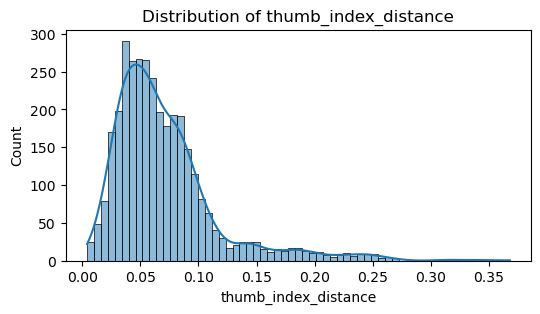

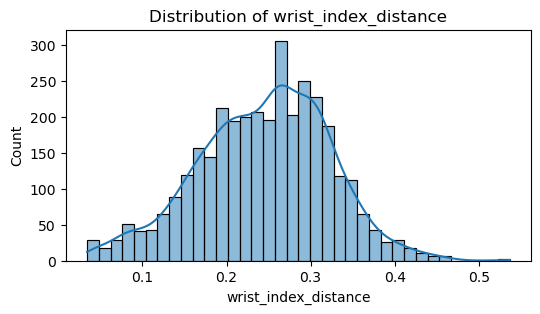

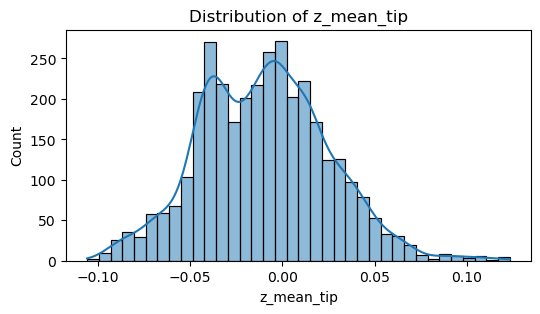

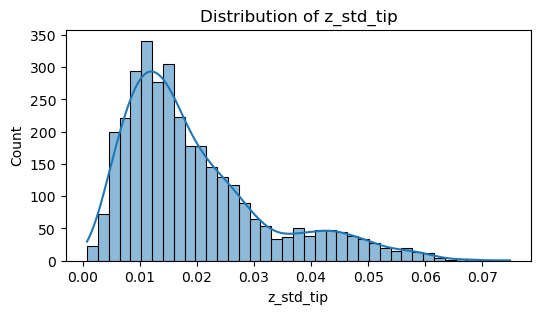

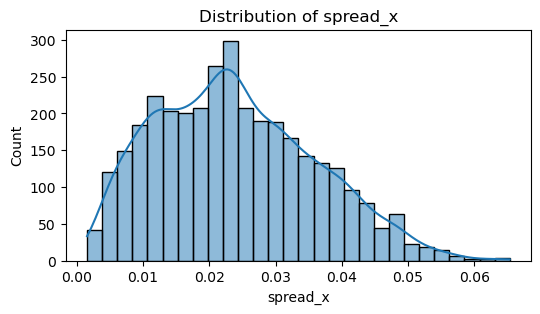

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_features.columns[:-1]:  # exclude Gesture
    plt.figure(figsize=(6, 3))
    sns.histplot(df_features[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: xlabel='Gesture', ylabel='thumb_index_distance'>

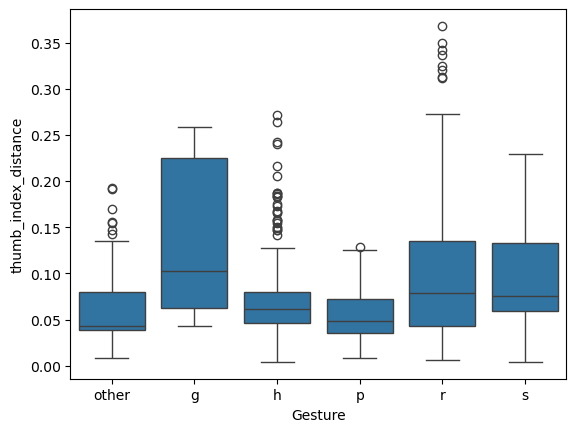

In [31]:
sns.boxplot(x="Gesture", y="thumb_index_distance", data=df_features)

In [32]:
df_features['Gesture'].value_counts()

Gesture
h        1363
p         871
r         620
other     242
s         202
g          99
Name: count, dtype: int64

In [35]:
def compute_features(df):
    features = pd.DataFrame()

    # 1. thumb_index_distance
    features['thumb_index_distance'] = np.sqrt(
        (df['x_4'] - df['x_8'])**2 + (df['y_4'] - df['y_8'])**2 + (df['z_4'] - df['z_8'])**2
    )

    # 2. wrist_index_distance
    features['wrist_index_distance'] = np.sqrt(
        (df['x_0'] - df['x_8'])**2 + (df['y_0'] - df['y_8'])**2 + (df['z_0'] - df['z_8'])**2
    )

    # 3. z_mean_tip, z_std_tip (ปลายนิ้ว: 4,8,12,16,20)
    tip_z = df[[f'z_{i}' for i in [4, 8, 12, 16, 20]]]
    features['z_mean_tip'] = tip_z.mean(axis=1)
    features['z_std_tip'] = tip_z.std(axis=1)

    # 4. spread_x, spread_y
    tip_x = df[[f'x_{i}' for i in [4, 8, 12, 16, 20]]]
    tip_y = df[[f'y_{i}' for i in [4, 8, 12, 16, 20]]]
    features['spread_x'] = tip_x.std(axis=1)
    features['spread_y'] = tip_y.std(axis=1)

    # 5. z_diff (thumb - index) → บอกแนวลึกของการกดหรือ pinch
    features['z_diff_thumb_index'] = df['z_4'] - df['z_8']

    # 6. palm_width (ระหว่าง knuckles: 5 ↔ 17)
    features['palm_width'] = np.sqrt(
        (df['x_5'] - df['x_17'])**2 + (df['y_5'] - df['y_17'])**2 + (df['z_5'] - df['z_17'])**2
    )

    # 7. Gesture label
    features['Gesture'] = df['Gesture']

    return features


In [36]:
df_features = compute_features(df_wide)

In [37]:
df_features

,thumb_index_distance,wrist_index_distance,z_mean_tip,z_std_tip,spread_x,spread_y,z_diff_thumb_index,palm_width,Gesture
0,0.023417,0.093854,0.017184,0.004076,0.007068,0.010327,-0.009578,0.011816,other
1,0.018745,0.100176,0.011990,0.007650,0.015162,0.016940,-0.014207,0.025405,other
2,0.010403,0.139147,-0.000971,0.010430,0.011160,0.015607,-0.009876,0.032343,other
3,0.008647,0.096230,0.004113,0.001611,0.004597,0.006975,0.002458,0.017945,other
4,0.011484,0.147320,0.010205,0.010250,0.005953,0.013449,-0.010910,0.023849,other
...,...,...,...,...,...,...,...,...,...
3393,0.043977,0.185363,0.014431,0.006710,0.036430,0.051707,-0.010438,0.062892,other
3394,0.043080,0.185601,0.012384,0.006121,0.036605,0.051753,-0.010737,0.062641,other
3395,0.044546,0.184638,0.012152,0.006319,0.036889,0.051631,-0.011270,0.062720,other
3396,0.043790,0.185680,0.011881,0.006327,0.036931,0.051052,-0.010121,0.063192,other


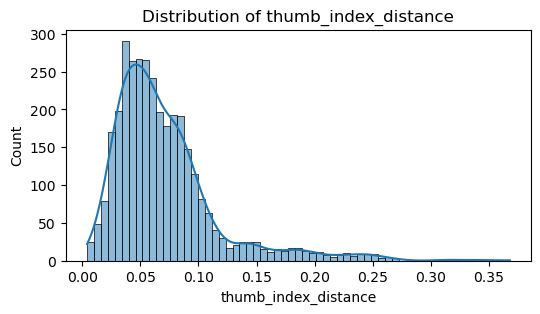

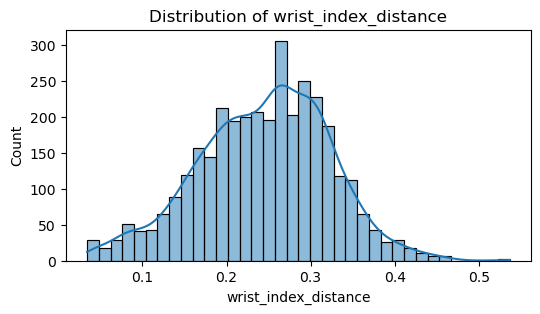

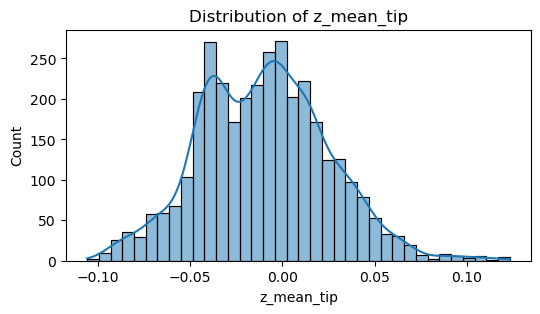

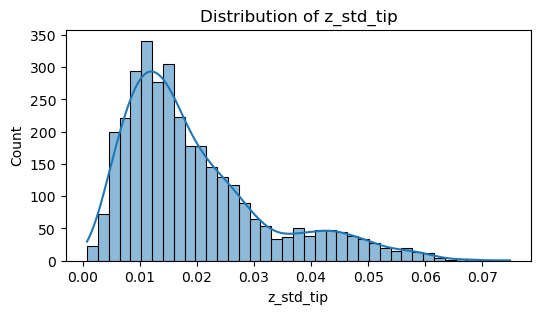

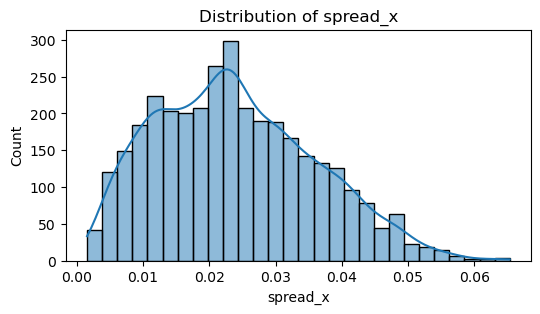

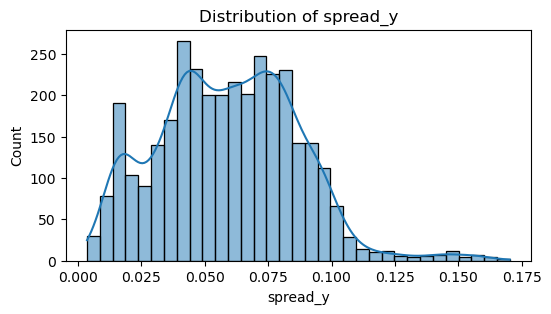

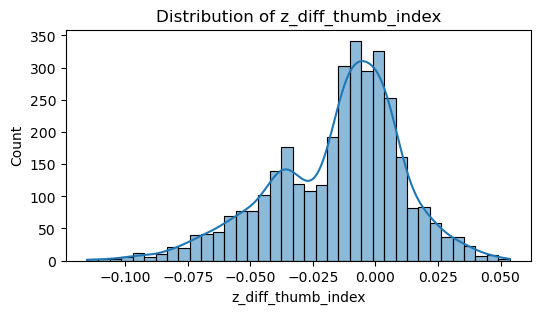

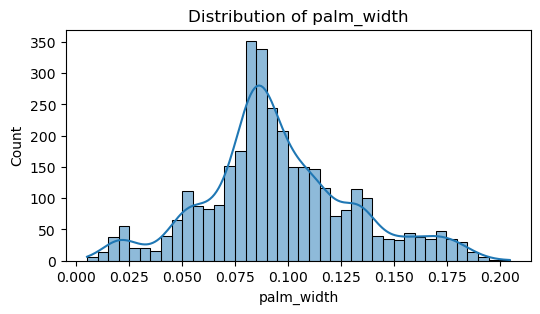

In [38]:
for col in df_features.columns[:-1]:  # exclude Gesture
    plt.figure(figsize=(6, 3))
    sns.histplot(df_features[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [39]:
df_features['Gesture'].value_counts()

Gesture
h        1363
p         872
r         620
other     242
s         202
g          99
Name: count, dtype: int64

In [40]:
df_features.isnull().sum()

thumb_index_distance    1
wrist_index_distance    1
z_mean_tip              0
z_std_tip               1
spread_x                1
spread_y                1
z_diff_thumb_index      1
palm_width              1
Gesture                 0
dtype: int64

In [41]:
df_features[df_features.isnull().any(axis=1)]

,thumb_index_distance,wrist_index_distance,z_mean_tip,z_std_tip,spread_x,spread_y,z_diff_thumb_index,palm_width,Gesture
765,NaN,NaN,-0.035736,NaN,NaN,NaN,NaN,NaN,p


In [42]:
df_features = df_features.dropna()

In [43]:
df_features.describe()

,thumb_index_distance,wrist_index_distance,z_mean_tip,z_std_tip,spread_x,spread_y,z_diff_thumb_index,palm_width
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,0.070532,0.244485,-0.009965,0.019534,0.023913,0.059224,-0.015280,0.095565
std,0.045440,0.077599,0.034754,0.012694,0.011934,0.027321,0.025942,0.034946
min,0.004117,0.034109,-0.105779,0.000784,0.001569,0.003700,-0.115308,0.005264
25%,0.040814,0.192269,-0.036057,0.010505,0.014442,0.040223,-0.032890,0.076720
50%,0.059792,0.251241,-0.009629,0.015800,0.022943,0.059133,-0.010092,0.090761
75%,0.085887,0.299428,0.012888,0.024795,0.031835,0.078283,0.002113,0.114576
max,0.367978,0.536797,0.123246,0.074782,0.065332,0.170192,0.053683,0.204594


In [50]:
def compute_rich_features(df):
    features = pd.DataFrame()
    
    # Base: XYZ
    for axis in ['x', 'y', 'z']:
        for i in range(21):
            features[f'{axis}_{i}'] = df[f'{axis}_{i}']
    
    # Temporal difference from previous frame
    for axis in ['x', 'y', 'z']:
        for i in range(21):
            col = f'{axis}_{i}'
            features[f'd_{col}'] = df[col].diff().fillna(0)  # Δ value

    # Pairwise distance: thumb-index (4-8), wrist-index (0-5), pinky-index (20-8)
    features['thumb_index_dist'] = np.linalg.norm(df[[f'{a}_4' for a in 'xyz']].values - df[[f'{a}_8' for a in 'xyz']].values, axis=1)
    features['wrist_index_dist'] = np.linalg.norm(df[[f'{a}_0' for a in 'xyz']].values - df[[f'{a}_5' for a in 'xyz']].values, axis=1)
    features['pinky_index_dist'] = np.linalg.norm(df[[f'{a}_20' for a in 'xyz']].values - df[[f'{a}_8' for a in 'xyz']].values, axis=1)

    # Palm width (knuckles): 5 to 17
    features['palm_width'] = np.linalg.norm(df[[f'{a}_5' for a in 'xyz']].values - df[[f'{a}_17' for a in 'xyz']].values, axis=1)

    # Tip spread std dev
    tip_x = df[[f'x_{i}' for i in [4, 8, 12, 16, 20]]]
    tip_y = df[[f'y_{i}' for i in [4, 8, 12, 16, 20]]]
    tip_z = df[[f'z_{i}' for i in [4, 8, 12, 16, 20]]]
    features['spread_x'] = tip_x.std(axis=1)
    features['spread_y'] = tip_y.std(axis=1)
    features['spread_z'] = tip_z.std(axis=1)

    # Normalized distances
    features['norm_thumb_index'] = features['thumb_index_dist'] / (features['palm_width'] + 1e-6)
    features['norm_wrist_index'] = features['wrist_index_dist'] / (features['palm_width'] + 1e-6)

    # Z mean tip normalized
    features['z_mean_tip'] = tip_z.mean(axis=1)
    features['z_mean_tip_norm'] = features['z_mean_tip'] / (features['palm_width'] + 1e-6)

    # Thumb-Index angle projection (in 2D: x-y)
    v1 = df[['x_4', 'y_4']].values - df[['x_0', 'y_0']].values
    v2 = df[['x_8', 'y_8']].values - df[['x_0', 'y_0']].values
    dot = np.einsum('ij,ij->i', v1, v2)
    norm_v1 = np.linalg.norm(v1, axis=1)
    norm_v2 = np.linalg.norm(v2, axis=1)
    cos_angle = dot / (norm_v1 * norm_v2 + 1e-6)
    features['thumb_index_angle_xy'] = np.arccos(np.clip(cos_angle, -1.0, 1.0))

    # Aggregation: velocity magnitude average
    vel_mag = np.sqrt(
        sum([(df[f'{a}_{i}'].diff().fillna(0))**2 for a in 'xyz' for i in range(21)])
    )
    features['velocity_magnitude'] = vel_mag

    # Keep gesture label
    features['Gesture'] = df['Gesture']

    return features


In [51]:
df_features = compute_rich_features(df_wide)
df_features

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_66022/2339102091.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'd_{col}'] = df[col].diff().fillna(0)  # Δ value
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_66022/2339102091.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'd_{col}'] = df[col].diff().fillna(0)  # Δ value
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_66022/2339102091.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.439152,0.410372,0.392198,0.379121,0.368621,0.413687,0.389965,0.382798,0.382179,0.418918,...,0.007068,0.010327,0.004076,1.981728,8.749580,0.017184,1.454242,0.014128,0.000000,other
1,0.446880,0.420233,0.400958,0.386086,0.375873,0.417231,0.396619,0.386996,0.382685,0.427051,...,0.015162,0.016940,0.007650,0.737830,3.933585,0.011990,0.471933,0.018321,0.090307,other
2,0.448999,0.424995,0.409311,0.397226,0.389651,0.437639,0.419415,0.402987,0.392533,0.449266,...,0.011160,0.015607,0.010430,0.321624,3.222977,-0.000971,-0.030025,0.025594,0.130101,other
3,0.461615,0.435223,0.419272,0.408268,0.399821,0.437466,0.415694,0.402070,0.396831,0.443715,...,0.004597,0.006975,0.001611,0.481811,4.505125,0.004113,0.229198,0.075540,0.105534,other
4,0.466189,0.442301,0.426694,0.414771,0.407884,0.452656,0.433908,0.417616,0.406986,0.459440,...,0.005953,0.013449,0.010250,0.481500,4.225918,0.010205,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.276108,0.235580,0.210509,0.192576,0.176305,0.229980,0.209859,0.202688,0.201799,0.254219,...,0.036430,0.051707,0.006710,0.699232,2.438302,0.014431,0.229451,0.225033,0.011902,other
3394,0.276328,0.235721,0.210938,0.193440,0.176782,0.230328,0.209717,0.202042,0.200757,0.254694,...,0.036605,0.051753,0.006121,0.687724,2.448563,0.012384,0.197693,0.216910,0.008567,other
3395,0.275588,0.235362,0.210758,0.193059,0.176679,0.229746,0.210076,0.202834,0.201628,0.253857,...,0.036889,0.051631,0.006319,0.710230,2.446167,0.012152,0.193744,0.225917,0.007659,other
3396,0.276735,0.236113,0.210839,0.192967,0.176522,0.230071,0.209972,0.202331,0.200950,0.254426,...,0.036931,0.051052,0.006327,0.692962,2.448912,0.011881,0.188011,0.221719,0.007127,other


In [54]:
def compute_rich_features(df):
    base_features = {}
    
    # 1. Raw coordinates (x0-x20, y0-y20, z0-z20)
    for axis in 'xyz':
        for i in range(21):
            col = f'{axis}_{i}'
            base_features[col] = df[col]

    # 2. Temporal difference (1st order velocity features)
    diff_features = {}
    for axis in 'xyz':
        for i in range(21):
            col = f'{axis}_{i}'
            diff_col = f'd_{axis}_{i}'
            diff_features[diff_col] = df[col].diff().fillna(0)

    # 3. Pairwise distances
    def dist(a, b):
        return np.linalg.norm(df[[f'{axis}_{a}' for axis in 'xyz']].values -
                              df[[f'{axis}_{b}' for axis in 'xyz']].values, axis=1)
    
    pairwise = {
        'thumb_index_dist': dist(4, 8),
        'wrist_index_dist': dist(0, 5),
        'pinky_index_dist': dist(20, 8),
        'palm_width': dist(5, 17)
    }

    # 4. Spread (std dev of finger tips)
    tip_ids = [4, 8, 12, 16, 20]
    tip_x = df[[f'x_{i}' for i in tip_ids]]
    tip_y = df[[f'y_{i}' for i in tip_ids]]
    tip_z = df[[f'z_{i}' for i in tip_ids]]
    spread = {
        'spread_x': tip_x.std(axis=1),
        'spread_y': tip_y.std(axis=1),
        'spread_z': tip_z.std(axis=1),
    }

    # 5. Normalized distances
    norm = {
        'norm_thumb_index': pairwise['thumb_index_dist'] / (pairwise['palm_width'] + 1e-6),
        'norm_wrist_index': pairwise['wrist_index_dist'] / (pairwise['palm_width'] + 1e-6),
    }

    # 6. Z mean/std tip + normalize
    z_mean_tip = tip_z.mean(axis=1)
    z_std_tip = tip_z.std(axis=1)
    z_features = {
        'z_mean_tip': z_mean_tip,
        'z_std_tip': z_std_tip,
        'z_mean_tip_norm': z_mean_tip / (pairwise['palm_width'] + 1e-6)
    }

    # 7. Thumb-index angle in 2D XY
    v1 = df[['x_4', 'y_4']].values - df[['x_0', 'y_0']].values
    v2 = df[['x_8', 'y_8']].values - df[['x_0', 'y_0']].values
    dot = np.einsum('ij,ij->i', v1, v2)
    norm_v1 = np.linalg.norm(v1, axis=1)
    norm_v2 = np.linalg.norm(v2, axis=1)
    cos_angle = dot / (norm_v1 * norm_v2 + 1e-6)
    angle_features = {
        'thumb_index_angle_xy': np.arccos(np.clip(cos_angle, -1.0, 1.0))
    }

    # 8. Velocity magnitude
    vel_mag = np.sqrt(
        sum((diff_features[f'd_{a}_{i}'] ** 2 for a in 'xyz' for i in range(21)))
    )
    velocity = {'velocity_magnitude': vel_mag}

    # รวมทั้งหมด
    features = pd.concat([
        pd.DataFrame(base_features),
        pd.DataFrame(diff_features),
        pd.DataFrame(pairwise, index=df.index),
        pd.DataFrame(spread, index=df.index),
        pd.DataFrame(norm, index=df.index),
        pd.DataFrame(z_features, index=df.index),
        pd.DataFrame(angle_features, index=df.index),
        pd.DataFrame(velocity, index=df.index),
        df[['Gesture']]  # Label
    ], axis=1)

    return features

In [56]:
df_features = compute_rich_features(df_wide)

In [57]:
df_features

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.439152,0.410372,0.392198,0.379121,0.368621,0.413687,0.389965,0.382798,0.382179,0.418918,...,0.010327,0.004076,1.981728,8.749580,0.017184,0.004076,1.454242,0.014128,0.000000,other
1,0.446880,0.420233,0.400958,0.386086,0.375873,0.417231,0.396619,0.386996,0.382685,0.427051,...,0.016940,0.007650,0.737830,3.933585,0.011990,0.007650,0.471933,0.018321,0.090307,other
2,0.448999,0.424995,0.409311,0.397226,0.389651,0.437639,0.419415,0.402987,0.392533,0.449266,...,0.015607,0.010430,0.321624,3.222977,-0.000971,0.010430,-0.030025,0.025594,0.130101,other
3,0.461615,0.435223,0.419272,0.408268,0.399821,0.437466,0.415694,0.402070,0.396831,0.443715,...,0.006975,0.001611,0.481811,4.505125,0.004113,0.001611,0.229198,0.075540,0.105534,other
4,0.466189,0.442301,0.426694,0.414771,0.407884,0.452656,0.433908,0.417616,0.406986,0.459440,...,0.013449,0.010250,0.481500,4.225918,0.010205,0.010250,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.276108,0.235580,0.210509,0.192576,0.176305,0.229980,0.209859,0.202688,0.201799,0.254219,...,0.051707,0.006710,0.699232,2.438302,0.014431,0.006710,0.229451,0.225033,0.011902,other
3394,0.276328,0.235721,0.210938,0.193440,0.176782,0.230328,0.209717,0.202042,0.200757,0.254694,...,0.051753,0.006121,0.687724,2.448563,0.012384,0.006121,0.197693,0.216910,0.008567,other
3395,0.275588,0.235362,0.210758,0.193059,0.176679,0.229746,0.210076,0.202834,0.201628,0.253857,...,0.051631,0.006319,0.710230,2.446167,0.012152,0.006319,0.193744,0.225917,0.007659,other
3396,0.276735,0.236113,0.210839,0.192967,0.176522,0.230071,0.209972,0.202331,0.200950,0.254426,...,0.051052,0.006327,0.692962,2.448912,0.011881,0.006327,0.188011,0.221719,0.007127,other


In [60]:
df_features.isnull().sum()

x_0                     1
x_1                     1
x_2                     1
x_3                     1
x_4                     1
                       ..
z_std_tip               1
z_mean_tip_norm         1
thumb_index_angle_xy    1
velocity_magnitude      0
Gesture                 0
Length: 141, dtype: int64

In [62]:
df_features[df_features.isnull().any(axis=1)]

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
764,0.550772,0.498819,0.474392,0.475142,0.4732,0.517901,0.488007,0.466382,0.453361,0.554927,...,0.047743,0.015543,0.621774,1.420431,-0.045476,0.015543,-0.473332,0.017041,0.025916,h
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.035736,NaN,NaN,NaN,0.000000,p


In [64]:
df_features = df_features.dropna()

In [66]:
df_features

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.439152,0.410372,0.392198,0.379121,0.368621,0.413687,0.389965,0.382798,0.382179,0.418918,...,0.010327,0.004076,1.981728,8.749580,0.017184,0.004076,1.454242,0.014128,0.000000,other
1,0.446880,0.420233,0.400958,0.386086,0.375873,0.417231,0.396619,0.386996,0.382685,0.427051,...,0.016940,0.007650,0.737830,3.933585,0.011990,0.007650,0.471933,0.018321,0.090307,other
2,0.448999,0.424995,0.409311,0.397226,0.389651,0.437639,0.419415,0.402987,0.392533,0.449266,...,0.015607,0.010430,0.321624,3.222977,-0.000971,0.010430,-0.030025,0.025594,0.130101,other
3,0.461615,0.435223,0.419272,0.408268,0.399821,0.437466,0.415694,0.402070,0.396831,0.443715,...,0.006975,0.001611,0.481811,4.505125,0.004113,0.001611,0.229198,0.075540,0.105534,other
4,0.466189,0.442301,0.426694,0.414771,0.407884,0.452656,0.433908,0.417616,0.406986,0.459440,...,0.013449,0.010250,0.481500,4.225918,0.010205,0.010250,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.276108,0.235580,0.210509,0.192576,0.176305,0.229980,0.209859,0.202688,0.201799,0.254219,...,0.051707,0.006710,0.699232,2.438302,0.014431,0.006710,0.229451,0.225033,0.011902,other
3394,0.276328,0.235721,0.210938,0.193440,0.176782,0.230328,0.209717,0.202042,0.200757,0.254694,...,0.051753,0.006121,0.687724,2.448563,0.012384,0.006121,0.197693,0.216910,0.008567,other
3395,0.275588,0.235362,0.210758,0.193059,0.176679,0.229746,0.210076,0.202834,0.201628,0.253857,...,0.051631,0.006319,0.710230,2.446167,0.012152,0.006319,0.193744,0.225917,0.007659,other
3396,0.276735,0.236113,0.210839,0.192967,0.176522,0.230071,0.209972,0.202331,0.200950,0.254426,...,0.051052,0.006327,0.692962,2.448912,0.011881,0.006327,0.188011,0.221719,0.007127,other


In [68]:
df_features.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude
count,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,...,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000
mean,0.444205,0.462627,0.477158,0.476894,0.469834,0.478372,0.476402,0.468658,0.464516,0.462409,...,0.023912,0.059228,0.019535,0.811357,2.089975,-0.009955,0.019535,-0.146177,0.168025,0.086061
std,0.125894,0.113121,0.103387,0.095167,0.092744,0.097463,0.085310,0.081089,0.080765,0.097380,...,0.011936,0.027324,0.012696,0.608393,0.900576,0.034754,0.012696,0.522120,0.190507,0.134973
min,0.084254,0.135740,0.178259,0.169585,0.157149,0.142099,0.175052,0.181630,0.178593,0.115914,...,0.001569,0.003700,0.000784,0.056507,0.623301,-0.105779,0.000784,-5.995987,0.004856,0.000000
25%,0.396865,0.409780,0.406800,0.412830,0.414097,0.418645,0.428352,0.425628,0.422793,0.403406,...,0.014441,0.040221,0.010503,0.461788,1.668893,-0.036051,0.010503,-0.424666,0.058479,0.029790
50%,0.461022,0.484069,0.487210,0.478860,0.469265,0.479049,0.471305,0.464681,0.461420,0.460338,...,0.022929,0.059138,0.015802,0.679046,2.046858,-0.009583,0.015802,-0.114335,0.111467,0.054170
75%,0.531725,0.532056,0.537659,0.537389,0.530106,0.540575,0.527107,0.512943,0.508893,0.530931,...,0.031839,0.078287,0.024796,0.948954,2.324024,0.012893,0.024796,0.132187,0.187525,0.094276
max,0.751921,0.756128,0.750716,0.722119,0.708597,0.740379,0.711464,0.689256,0.699227,0.725328,...,0.065332,0.170192,0.074782,7.985779,14.931450,0.123246,0.074782,3.643263,2.378188,2.566056


In [70]:
cols_to_drop = [f"{axis}_{i}" for axis in "xyz" for i in range(21)]

df_features_clean = df_features.drop(columns=cols_to_drop, errors="ignore")


In [72]:
df_features_clean

,d_x_0,d_x_1,d_x_2,d_x_3,d_x_4,d_x_5,d_x_6,d_x_7,d_x_8,d_x_9,...,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010327,0.004076,1.981728,8.749580,0.017184,0.004076,1.454242,0.014128,0.000000,other
1,0.007727,0.009861,0.008760,0.006965,0.007251,0.003544,0.006654,0.004198,0.000506,0.008134,...,0.016940,0.007650,0.737830,3.933585,0.011990,0.007650,0.471933,0.018321,0.090307,other
2,0.002120,0.004762,0.008353,0.011140,0.013778,0.020408,0.022796,0.015991,0.009848,0.022215,...,0.015607,0.010430,0.321624,3.222977,-0.000971,0.010430,-0.030025,0.025594,0.130101,other
3,0.012616,0.010229,0.009961,0.011042,0.010171,-0.000173,-0.003721,-0.000917,0.004298,-0.005551,...,0.006975,0.001611,0.481811,4.505125,0.004113,0.001611,0.229198,0.075540,0.105534,other
4,0.004574,0.007077,0.007422,0.006503,0.008063,0.015190,0.018213,0.015546,0.010155,0.015725,...,0.013449,0.010250,0.481500,4.225918,0.010205,0.010250,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.000854,0.000451,0.000243,-0.000130,-0.000250,0.000520,0.000575,0.000471,0.000708,0.000415,...,0.051707,0.006710,0.699232,2.438302,0.014431,0.006710,0.229451,0.225033,0.011902,other
3394,0.000220,0.000141,0.000429,0.000864,0.000478,0.000348,-0.000142,-0.000646,-0.001043,0.000476,...,0.051753,0.006121,0.687724,2.448563,0.012384,0.006121,0.197693,0.216910,0.008567,other
3395,-0.000741,-0.000360,-0.000180,-0.000381,-0.000104,-0.000582,0.000360,0.000792,0.000872,-0.000838,...,0.051631,0.006319,0.710230,2.446167,0.012152,0.006319,0.193744,0.225917,0.007659,other
3396,0.001148,0.000751,0.000081,-0.000092,-0.000157,0.000325,-0.000105,-0.000503,-0.000678,0.000570,...,0.051052,0.006327,0.692962,2.448912,0.011881,0.006327,0.188011,0.221719,0.007127,other


In [74]:
for col in df_features.columns:
    print(col)


x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
d_x_0
d_x_1
d_x_2
d_x_3
d_x_4
d_x_5
d_x_6
d_x_7
d_x_8
d_x_9
d_x_10
d_x_11
d_x_12
d_x_13
d_x_14
d_x_15
d_x_16
d_x_17
d_x_18
d_x_19
d_x_20
d_y_0
d_y_1
d_y_2
d_y_3
d_y_4
d_y_5
d_y_6
d_y_7
d_y_8
d_y_9
d_y_10
d_y_11
d_y_12
d_y_13
d_y_14
d_y_15
d_y_16
d_y_17
d_y_18
d_y_19
d_y_20
d_z_0
d_z_1
d_z_2
d_z_3
d_z_4
d_z_5
d_z_6
d_z_7
d_z_8
d_z_9
d_z_10
d_z_11
d_z_12
d_z_13
d_z_14
d_z_15
d_z_16
d_z_17
d_z_18
d_z_19
d_z_20
thumb_index_dist
wrist_index_dist
pinky_index_dist
palm_width
spread_x
spread_y
spread_z
norm_thumb_index
norm_wrist_index
z_mean_tip
z_std_tip
z_mean_tip_norm
thumb_index_angle_xy
velocity_magnitude
Gesture


In [76]:
cols_to_drop = [f"{axis}_{i}" for axis in ['x', 'y', 'z'] for i in range(21)] + \
               [f"d_{axis}_{i}" for axis in ['x', 'y', 'z'] for i in range(21)]

df_features_clean = df_features.drop(columns=cols_to_drop)

In [130]:
df_features_clean

,thumb_index_dist,wrist_index_dist,pinky_index_dist,palm_width,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.023417,0.103391,0.014156,0.011816,0.007068,0.010327,0.004076,1.981728,8.749580,0.017184,0.004076,1.454242,0.014128,0.000000,other
1,0.018745,0.099936,0.035472,0.025405,0.015162,0.016940,0.007650,0.737830,3.933585,0.011990,0.007650,0.471933,0.018321,0.090307,other
2,0.010403,0.104244,0.043880,0.032343,0.011160,0.015607,0.010430,0.321624,3.222977,-0.000971,0.010430,-0.030025,0.025594,0.130101,other
3,0.008647,0.080850,0.010934,0.017945,0.004597,0.006975,0.001611,0.481811,4.505125,0.004113,0.001611,0.229198,0.075540,0.105534,other
4,0.011484,0.100787,0.037687,0.023849,0.005953,0.013449,0.010250,0.481500,4.225918,0.010205,0.010250,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.043977,0.153352,0.092014,0.062892,0.036430,0.051707,0.006710,0.699232,2.438302,0.014431,0.006710,0.229451,0.225033,0.011902,other
3394,0.043080,0.153382,0.093459,0.062641,0.036605,0.051753,0.006121,0.687724,2.448563,0.012384,0.006121,0.197693,0.216910,0.008567,other
3395,0.044546,0.153426,0.092928,0.062720,0.036889,0.051631,0.006319,0.710230,2.446167,0.012152,0.006319,0.193744,0.225917,0.007659,other
3396,0.043790,0.154754,0.093307,0.063192,0.036931,0.051052,0.006327,0.692962,2.448912,0.011881,0.006327,0.188011,0.221719,0.007127,other


In [132]:
df_features_clean.to_csv("features_clean.csv", index=False)

In [86]:
df_features_clean.isnull().sum()

thumb_index_dist        0
wrist_index_dist        0
pinky_index_dist        0
palm_width              0
spread_x                0
spread_y                0
spread_z                0
norm_thumb_index        0
norm_wrist_index        0
z_mean_tip              0
z_std_tip               0
z_mean_tip_norm         0
thumb_index_angle_xy    0
velocity_magnitude      0
Gesture                 0
dtype: int64

In [88]:
df_features_clean[df_features_clean.isnull().any(axis=1)]

,thumb_index_dist,wrist_index_dist,pinky_index_dist,palm_width,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture


In [90]:
df_features_clean = df_features_clean.dropna()